In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [2]:
dataset = pd.read_csv('data/titanic.csv', sep=',')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,Montvila,1,Montvila_1,singleton,NaN,Adult,Not Mother
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Graham,1,Graham_1,singleton,B,Adult,Not Mother
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,Johnston,4,Johnston_4,small,NaN,Adult,Not Mother
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Behr,1,Behr_1,singleton,C,Adult,Not Mother


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  Surname      891 non-null    object 
 14  Fsize        891 non-null    int64  
 15  Family       891 non-null    object 
 16  FsizeD       891 non-null    object 
 17  Deck         204 non-null    object 
 18  Child        891 non-null    object 
 19  Mother  

In [4]:
dataset.shape

(891, 20)

In [5]:
dataset.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Surname',
       'Fsize', 'Family', 'FsizeD', 'Deck', 'Child', 'Mother'],
      dtype=object)

In [6]:
dataset.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Surname          0
Fsize            0
Family           0
FsizeD           0
Deck           687
Child            0
Mother           0
dtype: int64

In [7]:
#number of passengers
len(dataset)

891

In [8]:
# Mean age of the passengers
mean_age = dataset["Age"].sum()/len(dataset) # dataset["Age"].mean()
mean_age

29.789191919191918

In [9]:
# Number of passengers above 70 years old¶
passengers_above_70 = (dataset["Age"] > 70).sum() # len(dataset[dataset['Age'] > 70])
passengers_above_70


8

In [10]:
# Proportion of each class of passenger
pclass = dataset["Pclass"].unique()
pclass

array([3, 1, 2], dtype=int64)

In [11]:
dataset["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
for i in pclass:
    print(f"Proportion of passengers of class {i} is {((dataset['Pclass'] == i).sum() / len(dataset)):.2f}")

#method 2 using dataset.value_counts("Pclass", normalize= True)

Proportion of passengers of class 3 is 0.55
Proportion of passengers of class 1 is 0.24
Proportion of passengers of class 2 is 0.21


#### Age distribution of the passengers depending on the port of embarkment

In [13]:
dataset.groupby('Embarked').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,170.0,31.205412,15.122202,0.42,22.0,29.5,40.0,71.0
Q,77.0,29.577922,15.459426,2.00,20.0,25.0,35.0,74.0
S,644.0,29.440606,14.049507,0.67,21.0,28.0,37.0,80.0


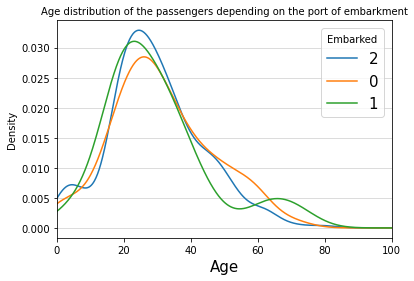

In [14]:
age_embarked=dataset["Embarked"].unique()
for variety in age_embarked:
    sub_data=dataset[dataset["Embarked"] == variety] # group subdata first then choose Age cols
    sub_data["Age"].plot(kind='density')
# method 2 dataset.groupby("Embarked")["Age"].plot(kind='density')
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Age',fontsize = 15)
plt.xlim(0,100)
plt.legend(['2','0','1'], title='Embarked',fontsize = 15)
plt.title('Age distribution of the passengers depending on the port of embarkment',fontsize = 10)

plt.show()

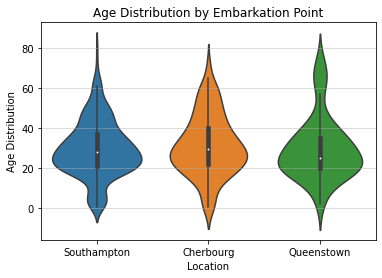

In [15]:
#method 3 using sns 
p = sns.violinplot(data = dataset, x = 'Embarked', y = 'Age',order=["S","C","Q"])
p.set(title = 'Age Distribution by Embarkation Point', xlabel = 'Location', ylabel = 'Age Distribution', xticklabels = ['Southampton','Cherbourg', 'Queenstown']);
plt.grid(axis='y', alpha=0.55)

#### Fare vs. age (scatter plot)

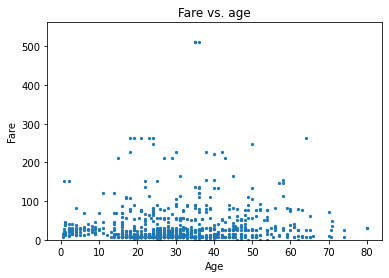

In [18]:
#Distribution Fare and age
plt.scatter(dataset["Age"],dataset["Fare"],s=5)
plt.ylim(0,dataset["Fare"].max()+50)
plt.title("Fare vs. age")
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

#### Age distribution of the passengers who survided/did not survive

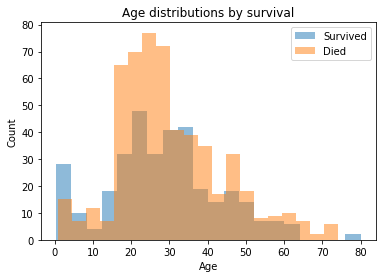

In [22]:
plt.hist(dataset[dataset['Survived'] == 1]['Age'], alpha=0.5, label="Survived", bins=20)
plt.hist(dataset[dataset['Survived'] == 0]['Age'], alpha=0.5, label="Died", bins=20)
plt.title("Age distributions by survival")
plt.ylabel("Count")
plt.xlabel("Age")
plt.legend()
plt.show()

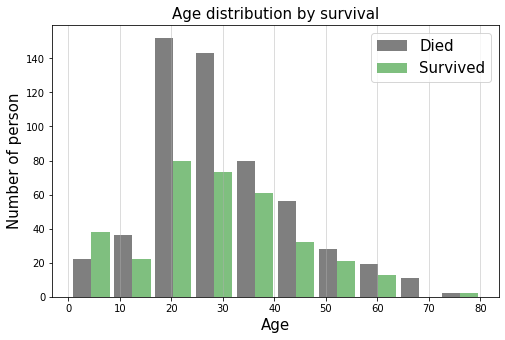

In [23]:
plt.figure(figsize=[8,5])
Age_die=dataset['Age'][dataset['Survived']==0]
Age_survived=dataset['Age'][dataset['Survived']==1]
plt.hist([Age_die,Age_survived],stacked= False , color=['black', 'Green'],alpha=0.5, rwidth=0.9)
plt.title('Age distribution by survival', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of person', fontsize = 15)
plt.legend(['Died','Survived'], fontsize = 15)
plt.grid(axis='x', alpha=0.55)
plt.show()

### Repartition of survivals among men and women (stacked bars)

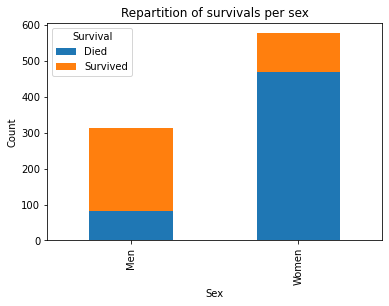

In [24]:
dataset.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks([0,1], ['Men', 'Women'])
plt.ylabel("Count")
plt.title("Repartition of survivals per sex")
plt.legend(title = 'Survival', labels =['Died', 'Survived'])
plt.show()

#### Repartition of survivals for each class (stacked bars)

In [27]:
dataset["Survived"].unique() # check label

array([0, 1], dtype=int64)

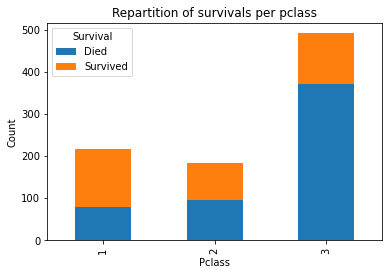

In [26]:
dataset.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.title("Repartition of survivals per pclass")
plt.legend(title = 'Survival', labels =['Died', 'Survived'])
plt.show()